In [33]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
# SETUP

!pip install -U "tensorflow-text==2.13.*"
!pip install "tf-models-official==2.13.*"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.6/106.6 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.5/242.5 kB 7.6 MB/s eta 0:00:00
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16161 sha256=05a52b68f2d99e3afb8fc599344964fcd5c29847fd1fe5018ac49a26024222f8
  Stored in directory: /root/.cache/pip/wheels/1a/67/4a/ad4082dd7dfc30f2abfe4d80a2ed5926a506eb8a972b4767fa
Successfully built seqeval


In [3]:
## Importing the necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import requests
from PIL import Image
from collections import Counter
from tqdm import tqdm

import string
import re
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud ,STOPWORDS
import spacy
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, auc, roc_curve
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize

import shutil
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense, Activation, Dropout
from keras.layers import Embedding, BatchNormalization
from keras.utils import to_categorical
from keras.layers import GlobalMaxPooling1D, Conv1D, MaxPooling1D, Flatten, Bidirectional, SpatialDropout1D
from keras.preprocessing import sequence, text
from keras.callbacks import EarlyStopping

# Load the spaCy English model
nlp = spacy.load("en_core_web_sm")
nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [4]:
df = pd.read_csv('/content/drive/MyDrive/cyberbullying/youtube_parsed_dataset.csv')
df

,index,UserIndex,Text,Number of Comments,Number of Subscribers,Membership Duration,Number of Uploads,Profanity in UserID,Age,oh_label
0,0,X1,Does N.e.bodyelse Hear her Crazy ass Screamin ...,10,1,3,3,0,15,0
1,1,X2,There are so many things that are incorrect wi...,3,0,6,5,0,31,0
2,2,X3,3:26 hahah my boyfriend showed this song to me...,7,0,3,5,0,43,1
3,3,X2218,dick beyonce fuck y a ass hole you are truely ...,34,0,3,5,0,44,1
4,4,X5,DongHaeTaemin and Kai ;A; luhansehun and bacon...,11,173,5,5,0,21,0
...,...,...,...,...,...,...,...,...,...,...
3459,3464,X3465,She pretty I love this song I miss the old kel...,15,2,4,7,0,23,1
3460,3465,X3466,Status-Online Im ZxkillergirlzX! I'm Zxkillerg...,4,28,4,23,1,15,0
3461,3466,X3467,JR so cute EXO M Better I agree like yeah yeah...,23,0,5,3,0,33,0
3462,3467,X3468,! !,5,0,6,5,0,38,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3464 entries, 0 to 3463
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   index                  3464 non-null   int64 
 1   UserIndex              3464 non-null   object
 2   Text                   3464 non-null   object
 3   Number of Comments     3464 non-null   int64 
 4   Number of Subscribers  3464 non-null   int64 
 5   Membership Duration    3464 non-null   int64 
 6   Number of Uploads      3464 non-null   int64 
 7   Profanity in UserID    3464 non-null   int64 
 8   Age                    3464 non-null   int64 
 9   oh_label               3464 non-null   int64 
dtypes: int64(8), object(2)
memory usage: 270.8+ KB


In [6]:
df.isnull().sum()

index                    0
UserIndex                0
Text                     0
Number of Comments       0
Number of Subscribers    0
Membership Duration      0
Number of Uploads        0
Profanity in UserID      0
Age                      0
oh_label                 0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.drop(columns=['index','UserIndex'],inplace=True)
df.head()

,Text,Number of Comments,Number of Subscribers,Membership Duration,Number of Uploads,Profanity in UserID,Age,oh_label
0,Does N.e.bodyelse Hear her Crazy ass Screamin ...,10,1,3,3,0,15,0
1,There are so many things that are incorrect wi...,3,0,6,5,0,31,0
2,3:26 hahah my boyfriend showed this song to me...,7,0,3,5,0,43,1
3,dick beyonce fuck y a ass hole you are truely ...,34,0,3,5,0,44,1
4,DongHaeTaemin and Kai ;A; luhansehun and bacon...,11,173,5,5,0,21,0


In [9]:
df['Profanity in UserID'].value_counts()

0    3072
1     392
Name: Profanity in UserID, dtype: int64

In [10]:
df['oh_label'].value_counts()

0    3047
1     417
Name: oh_label, dtype: int64

In [11]:
X = df.drop(columns=['Text'])

In [12]:
X.corr()

,Number of Comments,Number of Subscribers,Membership Duration,Number of Uploads,Profanity in UserID,Age,oh_label
Number of Comments,1.000000,0.004380,0.045901,-0.025961,0.036386,0.043327,0.132110
Number of Subscribers,0.004380,1.000000,0.051773,0.144826,-0.006535,0.007388,-0.006936
Membership Duration,0.045901,0.051773,1.000000,0.071316,-0.015177,0.177568,0.043914
Number of Uploads,-0.025961,0.144826,0.071316,1.000000,-0.013905,0.020734,-0.040118
Profanity in UserID,0.036386,-0.006535,-0.015177,-0.013905,1.000000,0.010318,0.005070
Age,0.043327,0.007388,0.177568,0.020734,0.010318,1.000000,0.049380
oh_label,0.132110,-0.006936,0.043914,-0.040118,0.005070,0.049380,1.000000


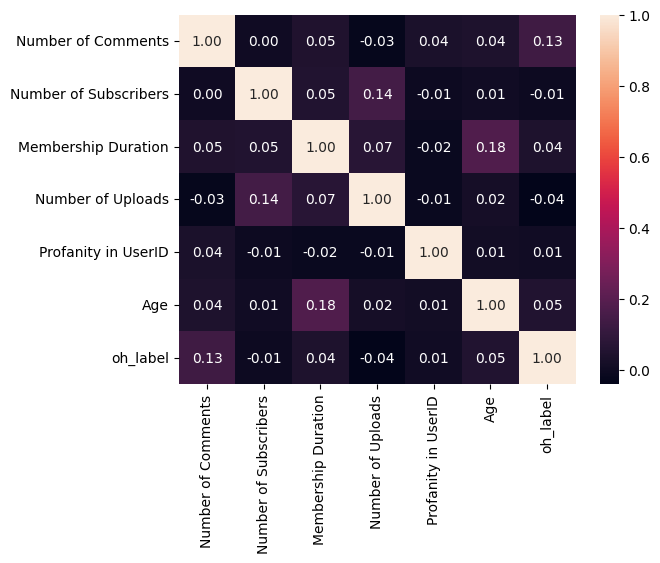

In [13]:
sns.heatmap(X.corr(),annot=True,fmt='0.2f')
plt.show()

Here we can see very less correlation of the independent features with the target variable (`oh_label`).
So, these features will make no impact to the model.

In [14]:
df = df[['Text','oh_label']]
df.head()

,Text,oh_label
0,Does N.e.bodyelse Hear her Crazy ass Screamin ...,0
1,There are so many things that are incorrect wi...,0
2,3:26 hahah my boyfriend showed this song to me...,1
3,dick beyonce fuck y a ass hole you are truely ...,1
4,DongHaeTaemin and Kai ;A; luhansehun and bacon...,0


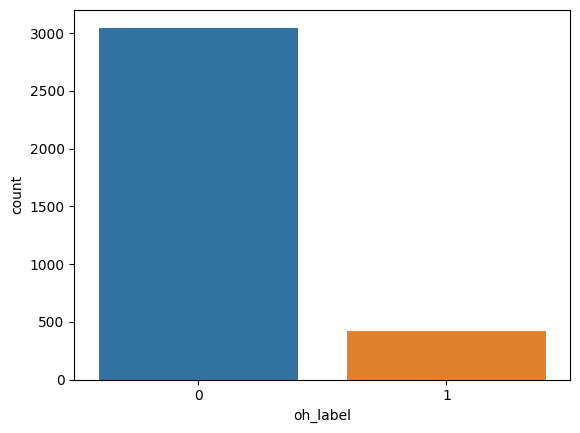

In [15]:
sns.countplot(df, x='oh_label', palette='tab10')
plt.show()

# Preprocessing

## Clean emoji

In [16]:
def clean_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols
                           u"\U0001F680-\U0001F6FF"  # transport
                           u"\U0001F1E0-\U0001F1FF"  # flags
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)

    return emoji_pattern.sub(r'', text)

In [17]:
df['Text'] = df['Text'].apply(clean_emoji)
df

,Text,oh_label
0,Does N.e.bodyelse Hear her Crazy ass Screamin ...,0
1,There are so many things that are incorrect wi...,0
2,3:26 hahah my boyfriend showed this song to me...,1
3,dick beyonce fuck y a ass hole you are truely ...,1
4,DongHaeTaemin and Kai ;A; luhansehun and bacon...,0
...,...,...
3459,She pretty I love this song I miss the old kel...,1
3460,Status-Online Im ZxkillergirlzX! I'm Zxkillerg...,0
3461,JR so cute EXO M Better I agree like yeah yeah...,0
3462,! !,0


# Chat words

In comments or chat, sometimes people use chat words/ slang words which is need to be converted into actual words to get the proper semantic meaning of the sentence.
I download a `slang.txt` file from online and imported here. Anyway, we can make our own slang data or add some more new inputs according to the dataset.

In [18]:
def text_file_to_dict(file_path):
    # Initialize an empty dictionary
    abbreviations_dict = {}

    # Open the file and read its content
    with open(file_path, 'r') as file:
        # Read each line in the file
        for line in file:
            # Split each line into abbreviation and meaning using '='
            parts = line.strip().split('=')
            # Check if there are exactly two parts
            if len(parts) == 2:
                abbreviation, meaning = parts
                # Add abbreviation and meaning to the dictionary
                abbreviations_dict[abbreviation] = meaning

    return abbreviations_dict

In [19]:
file_path = '/content/drive/MyDrive/slang.txt'
abbreviations_dict = text_file_to_dict(file_path)
print(abbreviations_dict)

{'AFAIK': 'As Far As I Know', 'AFK': 'Away From Keyboard', 'ASAP': 'As Soon As Possible', 'ATK': 'At The Keyboard', 'ATM': 'At The Moment', 'A3': 'Anytime, Anywhere, Anyplace', 'BAK': 'Back At Keyboard', 'BBL': 'Be Back Later', 'BBS': 'Be Back Soon', 'BFN': 'Bye For Now', 'B4N': 'Bye For Now', 'BRB': 'Be Right Back', 'BRT': 'Be Right There', 'BTW': 'By The Way', 'B4': 'Before', 'CU': 'See You', 'CUL8R': 'See You Later', 'CYA': 'See You', 'FAQ': 'Frequently Asked Questions', 'FC': 'Fingers Crossed', 'FWIW': "For What It's Worth", 'FYI': 'For Your Information', 'GAL': 'Get A Life', 'GG': 'Good Game', 'GN': 'Good Night', 'GMTA': 'Great Minds Think Alike', 'GR8': 'Great!', 'G9': 'Genius', 'IC': 'I See', 'ICQ': 'I Seek you', 'IMHO': 'In My Honest/Humble Opinion', 'IMO': 'In My Opinion', 'IOW': 'In Other Words', 'IRL': 'In Real Life', 'KISS': 'Keep It Simple, Stupid', 'LDR': 'Long Distance Relationship', 'LMAO': 'Laughing my a** off', 'LOL': 'Laughing out loud', 'LTNS': 'Long Time No See', '

In [20]:
def chat_conversion(text):
    new_text = []
    for w in text.split():
        if w.upper() in abbreviations_dict:
            new_text.append(abbreviations_dict[w.upper()])
        else:
            new_text.append(w)
    return " ".join(new_text)

In [21]:
df['Text'] = df['Text'].apply(chat_conversion)
df

,Text,oh_label
0,Does N.e.bodyelse Hear her Crazy ass Screamin ...,0
1,There are so many things that are incorrect wi...,0
2,3:26 hahah my boyfriend showed this song to me...,1
3,dick beyonce fuck y a ass hole you are truely ...,1
4,DongHaeTaemin and Kai ;A; luhansehun and bacon...,0
...,...,...
3459,She pretty I love this song I miss the old kel...,1
3460,Status-Online Im ZxkillergirlzX! I'm Zxkillerg...,0
3461,JR so cute EXO M Better I agree like yeah yeah...,0
3462,! !,0


In [22]:
stop_words = stopwords.words('english')

In [23]:
def preprocessed_text(text):
    # Remove punctuation
    exclude = string.punctuation
    text = text.translate(str.maketrans('', '', exclude))
    # Remove numericals
    text = re.sub(r'\d+', '', text)
    # Remove mentions and hashtags
    text = re.sub(r'(@[A-Za-z0-9_]+|#\w+)', '', text)
    # Convert into lowercase
    text = text.lower()
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    # Lemmatize tokens
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]
    # Join tokens back into text
    preprocessed_text = ' '.join(lemmatized_tokens)
    return preprocessed_text

In [24]:
df['Text']= df['Text'].apply(preprocessed_text)
df

,Text,oh_label
0,nebodyelse hear crazy as screamin hoe everytim...,0
1,many thing incorrect comment unbelievable gun ...,0
2,hahah boyfriend showed song love tooo seizure ...,1
3,dick beyonce fuck as hole truely dog bitch pha...,1
4,donghaetaemin kai luhansehun bacon xd taemindo...,0
...,...,...
3459,pretty love song miss old kelly ok rihanna yes...,1
3460,statusonline im zxkillergirlzx im zxkillergirl...,0
3461,jr cute exo better agree like yeah yeah yeah w...,0
3462,,0


# word cloud

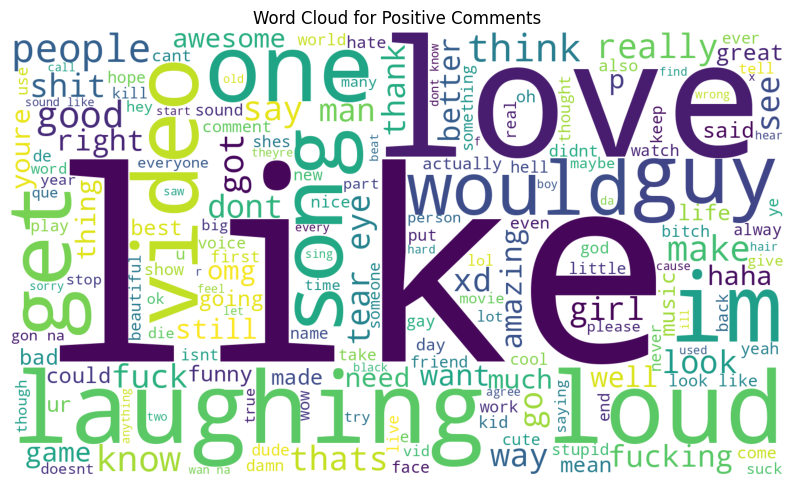

CPU times: user 5.28 s, sys: 302 ms, total: 5.59 s
Wall time: 5.53 s


In [25]:
%%time
positive_comments = df[df['oh_label'] == 0]['Text']
pos = ' '.join(map(str, positive_comments))
pos_wordcloud = WordCloud(width=1400, height=800,
                          background_color='white',
                         stopwords=stop_words,
                          min_font_size=15).generate(pos)
plt.figure(figsize=(10, 10))
plt.imshow(pos_wordcloud)
plt.title('Word Cloud for Positive Comments')
plt.axis('off')
plt.show()

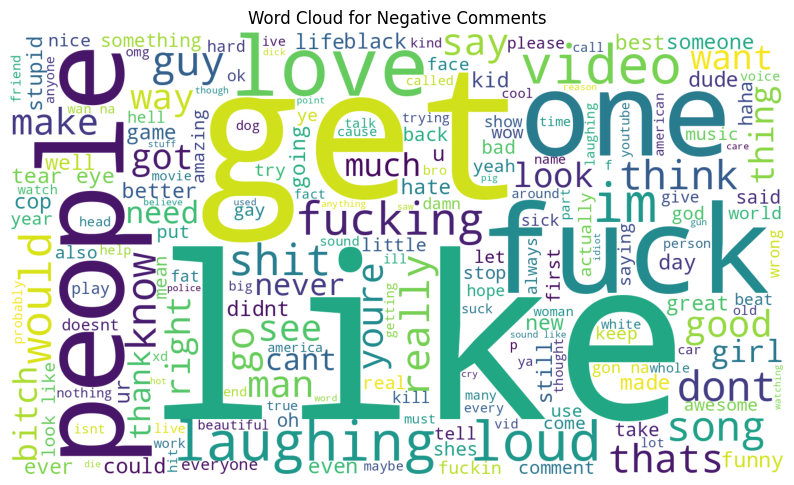

CPU times: user 3.45 s, sys: 173 ms, total: 3.62 s
Wall time: 3.52 s


In [26]:
%%time
negative_comments = df[df['oh_label'] == 1]['Text']
pos = ' '.join(map(str, negative_comments))
pos_wordcloud = WordCloud(width=1400, height=800,
                          background_color='white',
                         stopwords=stop_words,
                          min_font_size=15).generate(pos)
plt.figure(figsize=(10, 10))
plt.imshow(pos_wordcloud)
plt.title('Word Cloud for Negative Comments')
plt.axis('off')
plt.show()

In [27]:
len_text = [len(tx) for tx in df['Text'].to_list()]
print(f'Max Length : {np.max(len_text)}')
print(f'Min Length : {np.min(len_text)}')
print(f'Mean Length : {round(np.mean(len_text),2)}')
print(f'Std Length : {round(np.std(len_text),2)}')
print(f'Mew + 2sigma : {round(np.mean(len_text)+ 2 *np.std(len_text),2)}')

Max Length : 14014
Min Length : 0
Mean Length : 706.89
Std Length : 784.73
Mew + 2sigma : 2276.34


In [28]:
def make_corpus(kind):
    corpus = []
    for text in df.loc[df['oh_label']==kind]['Text'].str.split():
        for word in text:
            corpus.append(word)
    return corpus

In [29]:
sentiments = list(df.oh_label.unique())

Here we can see which words have the most impact in the positive and negative comments.

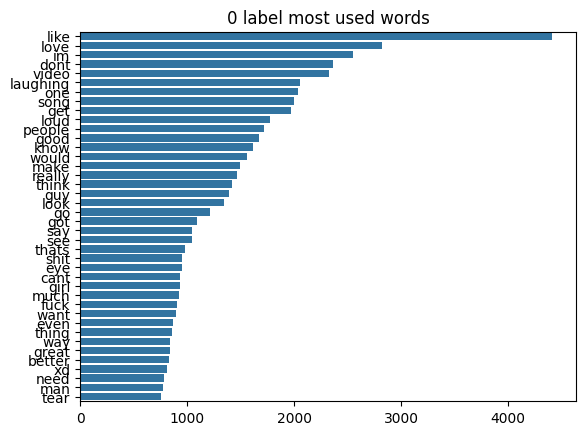

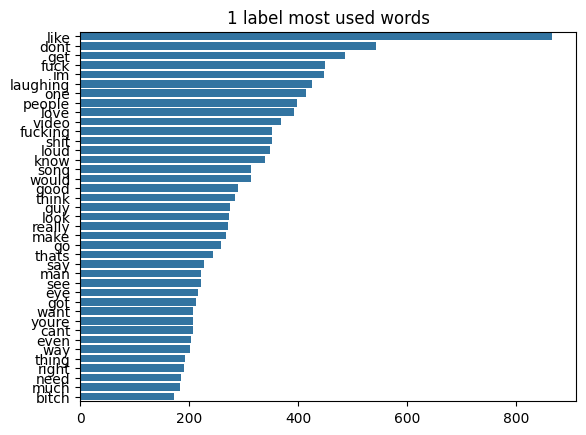

In [30]:
for inx , value in enumerate(sentiments):

    counter = Counter(make_corpus(value))
    most_common = counter.most_common()

    x = []
    y = []

    for word, count in most_common[:40]:
         if word not in stop_words:
            x.append(word)
            y.append(count)

    sns.barplot(x=y, y=x, orient='h')
    plt.title(f'{value} label most used words')
    plt.show()

# Deep learning models

In [31]:
# using the cleaned version of the dataset
ros = RandomOverSampler(random_state=42)
X = df['Text'].values.reshape(-1, 1)
y = df['oh_label'].values
X_resampled, y_resampled = ros.fit_resample(X, y)
X_resampled = X_resampled[:, 0]

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [32]:
# Create a Tokenizer object
token = Tokenizer()
max_len = 100

# Fit the Tokenizer on the training and testing data
token.fit_on_texts(list(X_train) + list(X_test))

# Generate sequences from the training and testing data
xtrain_seq = token.texts_to_sequences(X_train)
xvalid_seq = token.texts_to_sequences(X_test)

# Pad the sequences to the maximum length
xtrain_pad = sequence.pad_sequences(xtrain_seq, maxlen=max_len)
xvalid_pad = sequence.pad_sequences(xvalid_seq, maxlen=max_len)

# Get the word index
word_index = token.word_index

In [34]:
print('Preprocessed text', X_train[1])
print('\nTokenized text', xtrain_seq[1])
print('\nPadded text', xtrain_pad[1])
print('\nPadded text Length: ', len(xtrain_pad[1]))

Preprocessed text hand magic piano ear iknow already never let guessyou live californialuckyyyyyyyyyyyyy best cover ever sowhos nick oouuuuuuuuuuuuuuuuu ohhhnow know who nick scratch head scratch doctor dr bieber doesnt get better thatand also told bieber fever love justin honestly heard coldplay rihanna made song together im like go together finally heard blown away actually wish could father wow amazing spectacular special incredible list go list love hair love hair love hair america got talent american idol forget already superstar awwwwwwsoooooo cute look like zack cody omg cried literalyyou beautifully wish could voiceyour really beautiful hope want future cause superstar alreadyand good one omgu r amazing press hit head laughing loud thats funny iknow love french im literaly moving canada coming school wanted chek school cheer leading team really good mmmmnot sure move im gon na try cheer leading im screwd ellen andy child try harder get dirtyer hope die cancer jurk laughing loud

In [35]:
# load the GloVe vectors in a dictionary:

embeddings_index = {}
f = open('/content/drive/MyDrive/glove.6B.100d.txt','r',encoding='utf-8')
for line in tqdm(f):
    values = line.split(' ')
    word = values[0]
    coefs = np.asarray([float(val) for val in values[1:]])
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

400000it [00:45, 8804.48it/s] 

Found 400000 word vectors.


In [36]:
vocab_length = len(token.word_index) + 1
vocab_length

48197

In [37]:
# Glove word embeddings

from numpy import asarray, zeros
embedding_dict = dict()
glove_file = open('/content/drive/MyDrive/glove.6B.100d.txt', encoding='utf8')
for line in glove_file:
  records = line.split()
  word = records[0]
  vector_dim = asarray(records[1:], dtype='float32')
  embedding_dict[word] = vector_dim
glove_file.close()

In [38]:
# create an embedding matrix for the words we have in the dataset
embedding_matrix = np.zeros((len(word_index) + 1, 100))
for word, i in tqdm(word_index.items()):
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

100%|██████████| 48196/48196 [00:00<00:00, 309478.66it/s]


In [39]:
embedding_matrix.shape

(48197, 100)

In [40]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_resampled)))

Original dataset shape Counter({0: 3047, 1: 417})
Resampled dataset shape Counter({0: 3047, 1: 3047})


# Model Training

In [45]:
%%time
strategy = tf.distribute.MirroredStrategy()
with strategy.scope():

    # A simple LSTM with glove embeddings and one dense layer
    model = Sequential()
    model.add(Embedding(len(word_index) + 1,
                     100,
                     weights=[embedding_matrix],
                     input_length=max_len,
                     trainable=False))

    model.add(LSTM(units=128, dropout=0.2, recurrent_dropout=0.3))
    model.add(BatchNormalization())
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 100)          4819700   
                                                                 
 lstm_2 (LSTM)               (None, 128)               117248    
                                                                 
 batch_normalization_1 (Bat  (None, 128)               512       
 chNormalization)                                                
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 4937589 (18.84 MB)
Trainable params: 117633 (459.50 KB)
Non-trainable params: 4819956 (18.39 MB)
_________________________________________________________________
CPU times: user 496 ms, sys: 103 ms, total: 599 ms
Wall time: 1.17 s


In [46]:
history = model.fit(xtrain_pad, y_train, epochs=14, batch_size=64*strategy.num_replicas_in_sync, validation_split=0.2)

Epoch 1/14
61/61 [==============================] - 26s 356ms/step - loss: 0.6688 - accuracy: 0.6310 - val_loss: 0.6649 - val_accuracy: 0.6215
Epoch 2/14
61/61 [==============================] - 19s 314ms/step - loss: 0.5542 - accuracy: 0.7154 - val_loss: 0.6292 - val_accuracy: 0.7210
Epoch 3/14
61/61 [==============================] - 22s 357ms/step - loss: 0.4781 - accuracy: 0.7813 - val_loss: 0.5717 - val_accuracy: 0.7436
Epoch 4/14
61/61 [==============================] - 21s 351ms/step - loss: 0.4268 - accuracy: 0.8113 - val_loss: 0.5287 - val_accuracy: 0.7908
Epoch 5/14
61/61 [==============================] - 21s 350ms/step - loss: 0.3718 - accuracy: 0.8446 - val_loss: 0.4797 - val_accuracy: 0.8185
Epoch 6/14
61/61 [==============================] - 21s 352ms/step - loss: 0.3040 - accuracy: 0.8756 - val_loss: 0.3787 - val_accuracy: 0.8482
Epoch 7/14
61/61 [==============================] - 21s 348ms/step - loss: 0.2683 - accuracy: 0.8895 - val_loss: 0.3555 - val_accuracy: 0.8513

In [48]:
def plot_graphs(history, metric, loss):
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))

    # Plot training and validation accuracy
    axs[0].plot(history.history[metric])
    axs[0].plot(history.history['val_' + metric], '')
    axs[0].set_xlabel("Epochs")
    axs[0].set_ylabel(metric)
    axs[0].legend(['train_' + metric, 'val_' + metric])

    # Plot training and validation loss
    axs[1].plot(history.history[loss])
    axs[1].plot(history.history['val_' + loss], '')
    axs[1].set_xlabel("Epochs")
    axs[1].set_ylabel(loss)
    axs[1].legend(['train_' + loss, 'val_' + loss])

    plt.show()

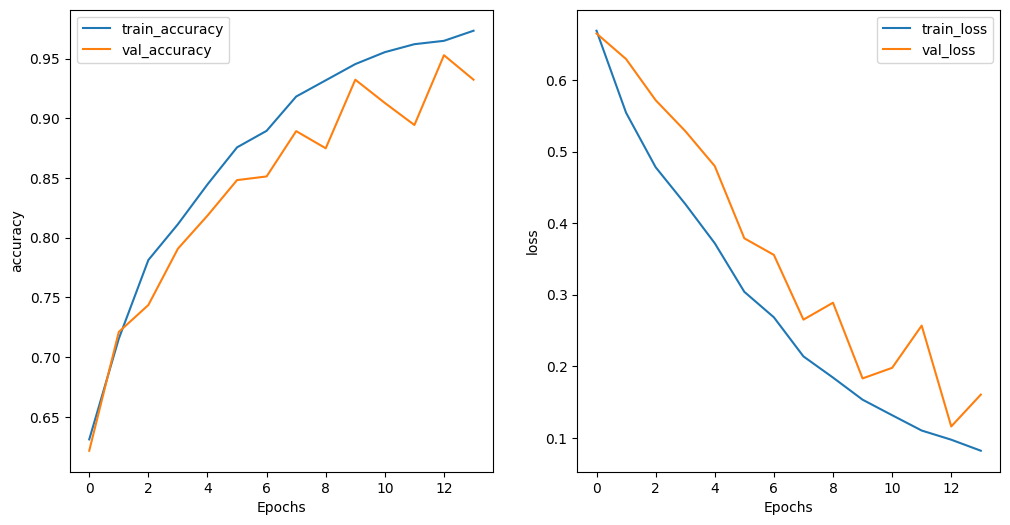

In [49]:
plot_graphs(history=history,metric='accuracy', loss='loss')

In [50]:
scores = model.predict(xvalid_pad)
auc = metrics.roc_auc_score(y_test, scores)
print("Auc: %.2f%%" % (auc * 100))

39/39 [==============================] - 2s 34ms/step
Auc: 97.97%


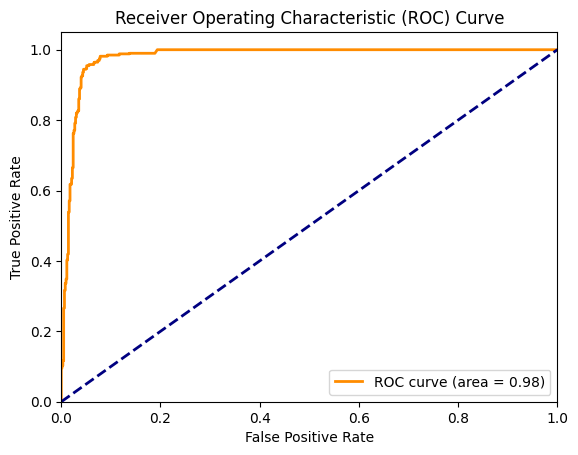

In [51]:
from sklearn.metrics import roc_auc_score, auc, roc_curve

# Compute ROC curve and ROC area for each class
fpr, tpr, thresholds = roc_curve(y_test, scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# BERT Model

In [52]:
ros = RandomOverSampler(random_state=42)
X = df['Text'].values.reshape(-1, 1)
y = df['oh_label'].values
X_resampled, y_resampled = ros.fit_resample(X, y)
X_resampled = X_resampled[:, 0]

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [53]:
# creating tensorflow datasets
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))

test_dataset = tf.data.Dataset.from_tensor_slices((X_test))

BUFFER_SIZE = 4000
BATCH_SIZE = 64
train_dataset = train_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [54]:
print("Train dataset element spec:", train_dataset.element_spec)
print("Test dataset element spec:", test_dataset.element_spec)

Train dataset element spec: (TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))
Test dataset element spec: TensorSpec(shape=(None,), dtype=tf.string, name=None)


In [55]:
for example, label in train_dataset.take(1): # take returns a batch of train_dataset, containing 64 feature, label pairs.
    print('texts: ', example.numpy()[:3])
    print()
    print('labels: ', label.numpy()[:3])

texts:  [b'mililiter laughing loud wer military still go onpost every forth july cause set game bounce house entertainment food everyone dark enough play god bless usa firework explode wer military still go onpost every forth july cause set game bounce house entertainment food everyone dark enough play god bless usa firework explode hav alot hat hav tooo many hat lol much pay instant artifical nail polish well shes ingaged married already give flying fk wat guy call know da hairstyle beauty called laughed way da comment box dear ryan gogo girl ganstapimp guy watever clear skin give glowy look please laughing loud love near ending gose dramatic song back stary night laughing loud ture found one person pause wear white clothing fall shes posted youtube pheedcom laughing loud wit themlol love da song jus becuz auburn becus sound good wit yall srry pinkrose lilsis account logout wen saw account name work work wit nonstraight hairfor instence mixppl hair aint line lucy singsme damn come mom

In [56]:
# loading the preprocessing and main model from tf hub links

tfhub_handle_encoder = 'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-256_A-4/2'
tfhub_handle_preprocess = 'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3'

bert_preprocess_model = hub.KerasLayer(tfhub_handle_preprocess)
bert_model = hub.KerasLayer(tfhub_handle_encoder)

In [59]:
# Testing the bert preprocessor

text_test = ["Today's weather is harsh", "My name is harsh"]
text_preprocessed = bert_preprocess_model(text_test)

for i in range(len(text_test)):
    print('Input text :', text_test[i])
    print(f'Keys       : {list(text_preprocessed.keys())}')
    print(f'Shape      : {text_preprocessed["input_word_ids"].shape}')
    print(f'Word Ids   : {text_preprocessed["input_word_ids"][i, :12]}')
    print(f'Input Mask : {text_preprocessed["input_mask"][i, :12]}')
    print(f'Type Ids   : {text_preprocessed["input_type_ids"][i, :12]}')
    print('\n')
# input_type_ids has the same shape as input_mask, but inside the non-padded region,
# contains a 0 or a 1 indicating which sentence the token is a part of.

# context is not being mapped at the preprocessing layer
# The word 'Harsh' will have the same token no matter what the scenario
# BERT will perform the contextualization when the text is passed through it

Input text : Today's weather is harsh
Keys       : ['input_mask', 'input_type_ids', 'input_word_ids']
Shape      : (2, 128)
Word Ids   : [ 101 2651 1005 1055 4633 2003 8401  102    0    0    0    0]
Input Mask : [1 1 1 1 1 1 1 1 0 0 0 0]
Type Ids   : [0 0 0 0 0 0 0 0 0 0 0 0]


Input text : My name is harsh
Keys       : ['input_mask', 'input_type_ids', 'input_word_ids']
Shape      : (2, 128)
Word Ids   : [ 101 2026 2171 2003 8401  102    0    0    0    0    0    0]
Input Mask : [1 1 1 1 1 1 0 0 0 0 0 0]
Type Ids   : [0 0 0 0 0 0 0 0 0 0 0 0]




In [60]:
# Model link: https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1

bert_results = bert_model(text_preprocessed)

print(f'Loaded BERT: {tfhub_handle_encoder}')
print(f'Keys       : {list(bert_results.keys())}')
print(f'Pooled Outputs Shape:{bert_results["pooled_output"].shape}')
print(f'Pooled Outputs Values:{bert_results["pooled_output"][0, :12]}')
print(f'Encoder Outputs Shape:{bert_results["encoder_outputs"][0].shape}')
# print(f'Encoder Outputs Values:{bert_results["encoder_outputs"][0][0, :3]}')
print(f'Sequence Outputs Shape:{bert_results["sequence_output"].shape}')
# print(f'Sequence Outputs Values:{bert_results["sequence_output"][0, :3]}')

# BERT takes our sentence and outputs a 768 token pooled representation, where every word is mapped in a 128 dimension array

Loaded BERT: https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-256_A-4/2
Keys       : ['sequence_output', 'encoder_outputs', 'pooled_output', 'default']
Pooled Outputs Shape:(2, 256)
Pooled Outputs Values:[-0.9348362   0.17717987 -0.9986929  -0.42187163  0.1177543   0.98258984
 -0.16275243 -0.04727213 -0.06515578  0.91539717  0.02720832  0.9951547 ]
Encoder Outputs Shape:(2, 128, 256)
Sequence Outputs Shape:(2, 128, 256)


In [61]:
# A function that takes in the links for the model and returns a newly compiled model

def create_model(model_link, preprocess_link):
  # bert_model = hub.KerasLayer(model_link)
  # bert_preprocess_model = hub.KerasLayer(preprcess_link)

    text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
    preprocessing_layer = hub.KerasLayer(preprocess_link, name='preprocessing')
    encoder_inputs = preprocessing_layer(text_input)
    encoder = hub.KerasLayer(model_link, trainable=True, name='BERT_encoder')
    outputs = encoder(encoder_inputs)
    net = outputs['pooled_output']
    net = tf.keras.layers.Dropout(0.1)(net)
    net = tf.keras.layers.Dense(1, activation=None, name='classifier')(net)

    model = tf.keras.Model(text_input, net)

    loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)
    metrics = tf.metrics.BinaryAccuracy()
    model.compile(optimizer=tf.keras.optimizers.Adam(1e-4),
                              loss=loss,
                              metrics=metrics)
    return model

In [64]:
DATA_SIZE = tf.data.experimental.cardinality(train_dataset).numpy()

print("Size of the dataset:", DATA_SIZE)
BATCH_SIZE = 16
STEPS_PER_EPOCH = DATA_SIZE // BATCH_SIZE
print('Steps per epoch:', STEPS_PER_EPOCH)

Size of the dataset: 77
Steps per epoch: 4


In [66]:
# bert_en_uncased_L-4_H-256_A-4/2

with strategy.scope():
    model = create_model('https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-256_A-4/2', 'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3')
model.fit(train_dataset, epochs=4, batch_size=16)
# directly passed in the train_dataset tensor to the model as the preprocessing layer takes care of embedding

Epoch 1/4
77/77 [==============================] - 439s 5s/step - loss: 0.6704 - binary_accuracy: 0.5707
Epoch 2/4
77/77 [==============================] - 399s 5s/step - loss: 0.4167 - binary_accuracy: 0.8035
Epoch 3/4
77/77 [==============================] - 388s 5s/step - loss: 0.1543 - binary_accuracy: 0.9430
Epoch 4/4
77/77 [==============================] - 389s 5s/step - loss: 0.0392 - binary_accuracy: 0.9881


## Some examples

In [68]:
# infer
def print_my_examples(inputs, results):
  result_for_printing = \
    [f'input: {inputs[i]:<30} : score: {results[i][0]:.6f}'
                         for i in range(len(inputs))]
  print(*result_for_printing, sep='\n')
  print()


examples = [
    'You fucking fuck ur dad',
    'You are beautiful',
    'suck my dick you fucking bitch',
    'all muslims are terrorists',
    'Women are terrible drivers'
]

# reloaded_results = tf.sigmoid(reloaded_model(tf.constant(examples)))
original_results = tf.sigmoid(model(tf.constant(examples)))

print('Results from the saved model:')
print_my_examples(examples, original_results)

Results from the saved model:
input: You fucking fuck ur dad        : score: 0.992208
input: You are beautiful              : score: 0.000918
input: suck my dick you fucking bitch : score: 0.963829
input: all muslims are terrorists     : score: 0.125744
input: Women are terrible drivers     : score: 0.101778

